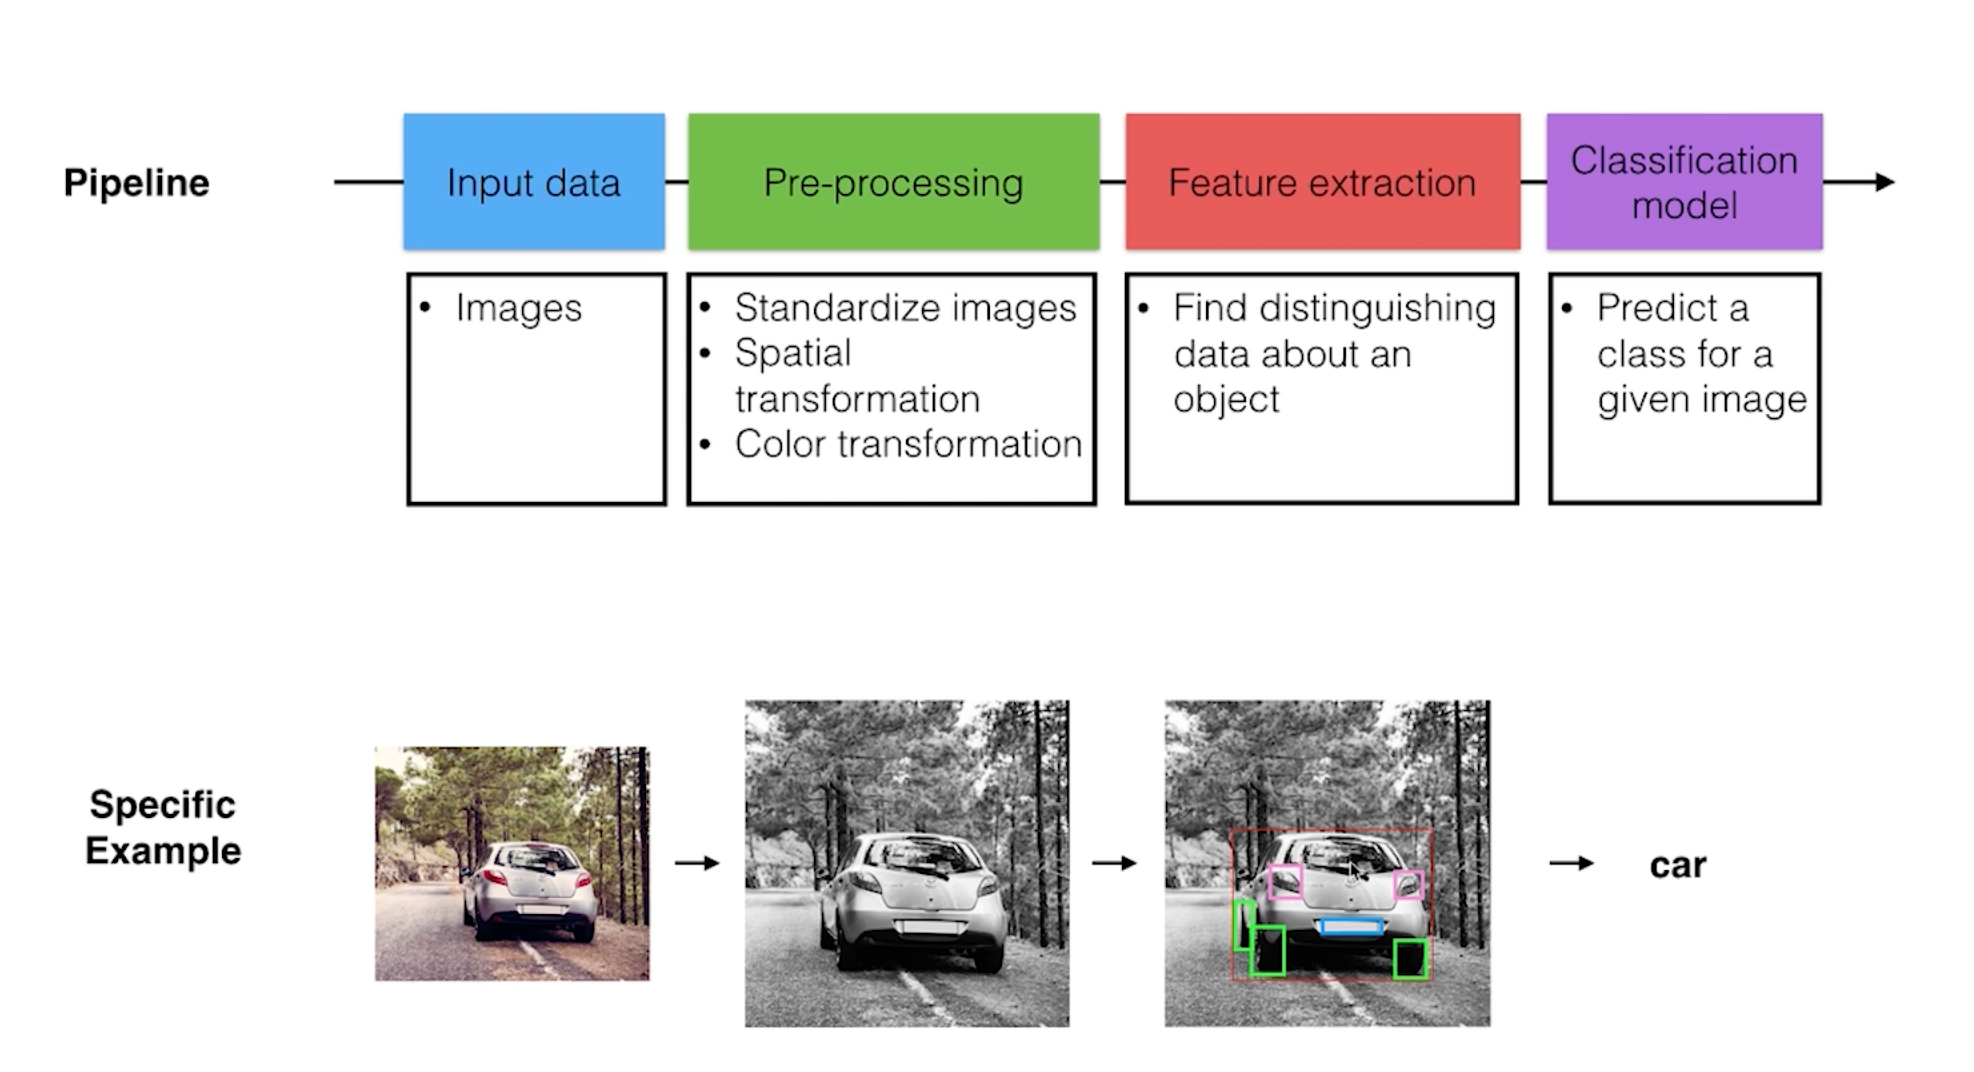

Image classification pipeline and specific pipeline example applied to classifying an image of a car.


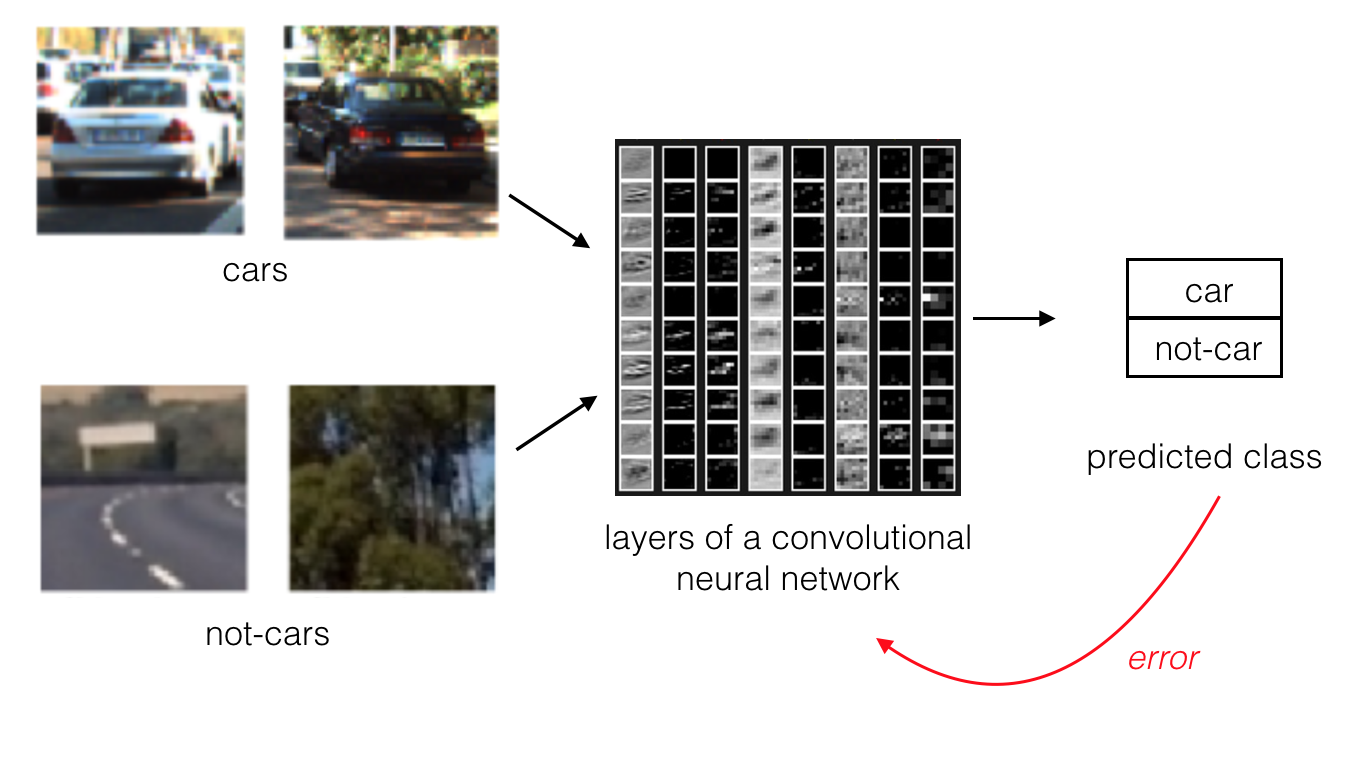

A convolutional neural network will adjust its pattern recognition algorithm until it learns to accurately classify a set of images.


# Images as Numerical Data

pip install opencv-python-headless


In [3]:
import numpy as np
import matplotlib.image as mpimg  # for reading in images

import matplotlib.pyplot as plt
import cv2  # computer vision library

%matplotlib inline

### Read in an image

Image dimensions: (624, 934, 4)


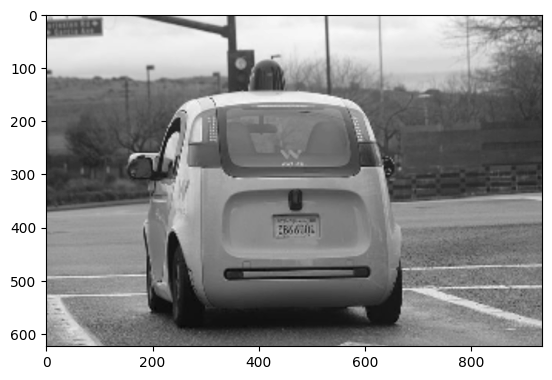

In [6]:
# Read in the image
image = mpimg.imread('waymo_car.png')

# Print out the image dimensions
print('Image dimensions:', image.shape)

# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')

In [7]:
# Prints specific grayscale pixel values
# What is the pixel value at x = 400 and y = 300 (on the body of the car)?

x = 400
y = 300

print(gray_image[y,x])


0.3921569


In [8]:
# Finds the maximum and minimum grayscale values in this image

max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max: ', max_val)
print('Min: ', min_val)

Max:  0.9764706
Min:  0.039215688


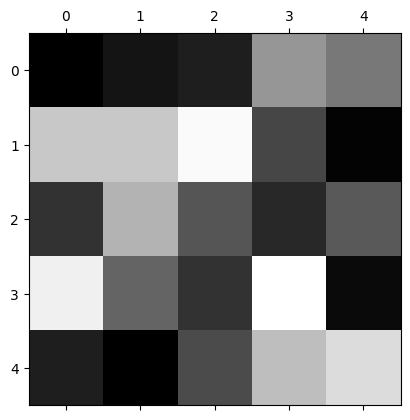

In [9]:
# Create a 5x5 image using just grayscale, numerical values
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

# To show the pixel grid, use matshow
plt.matshow(tiny_image, cmap='gray')

## TODO: See if you can draw a tiny smiley face or something else!
## You can change the values in the array above to do this

# Visualizing RGB Channels

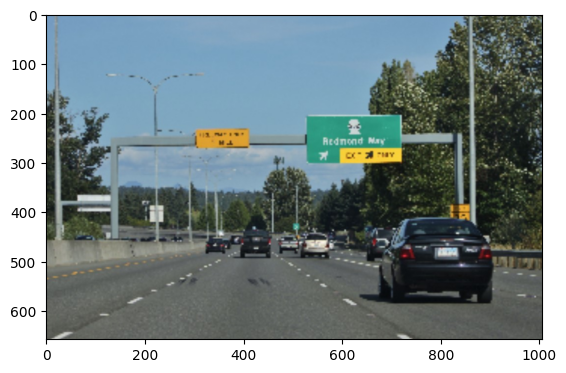

In [11]:
# Read in the image
image = mpimg.imread('wa_state_highway.jpg')

plt.imshow(image)

### RGB channels
Visualize the levels of each color channel.

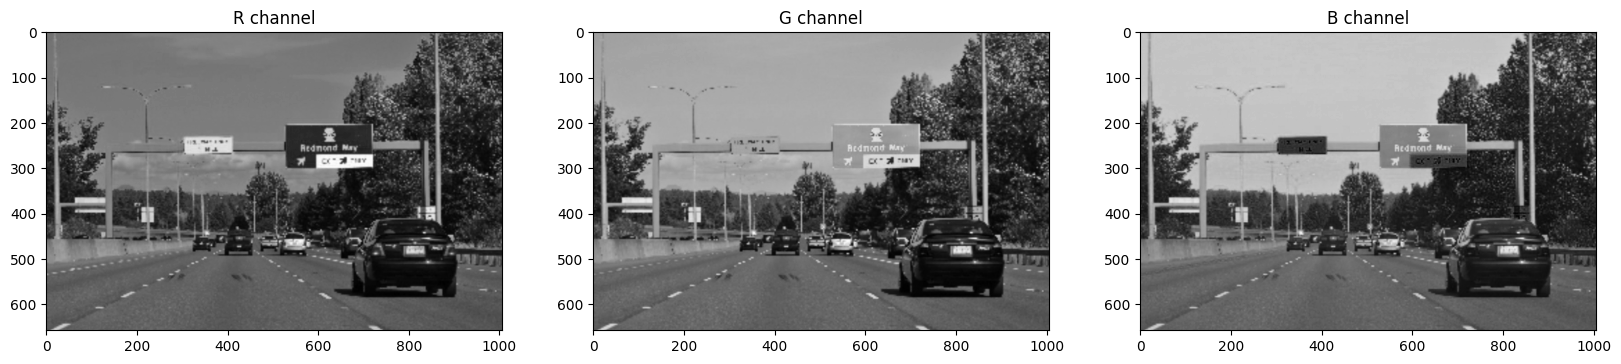

In [13]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')


# Cropping and Resizing

In [16]:
import numpy as np
import cv2

### Read in the first image of a stop sign

Image shape:  (862, 796, 3)


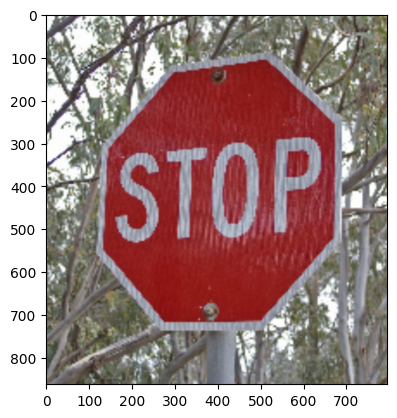

In [17]:
# Read in the image
stop1 = mpimg.imread('stop_sign.jpg')

print('Image shape: ', stop1.shape)
plt.imshow(stop1)

### Read in the second image

Image shape:  (805, 1204, 3)


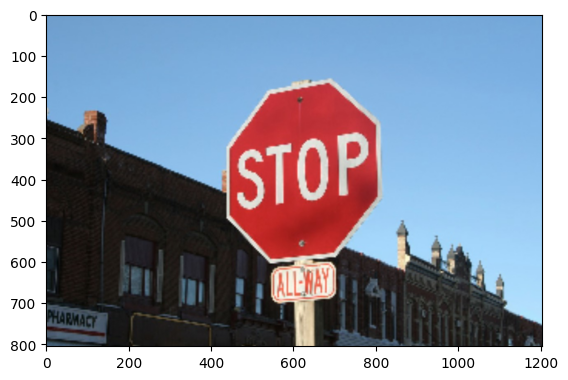

In [19]:
# Read in the image
stop2 = mpimg.imread('stop_sign2.jpg')

print('Image shape: ', stop2.shape)
plt.imshow(stop2)

## Crop this image so that it resembles the first image


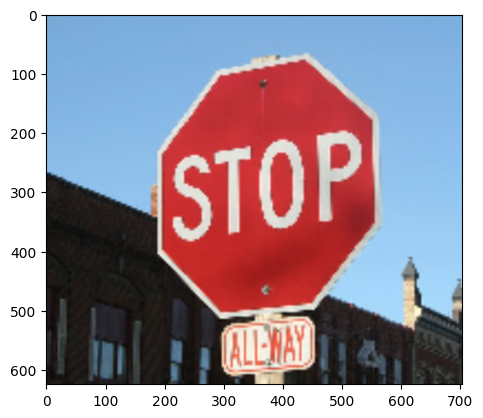

In [21]:
# To crop and image, you can use image slicing 
# which is just slicing off a portion of the image array

# Make a copy of the image to manipulate
image_crop = np.copy(stop2)

# Define how many pixels to slice off the sides of the original image
row_crop = 90
col_crop = 250

# Using image slicing, subtract the row_crop from top/bottom and col_crop from left/right
image_crop = stop2[row_crop:-row_crop, col_crop:-col_crop, :]

plt.imshow(image_crop)

## Resize the cropped image to be the same as the first

Image shape:  (1500, 1389, 3)


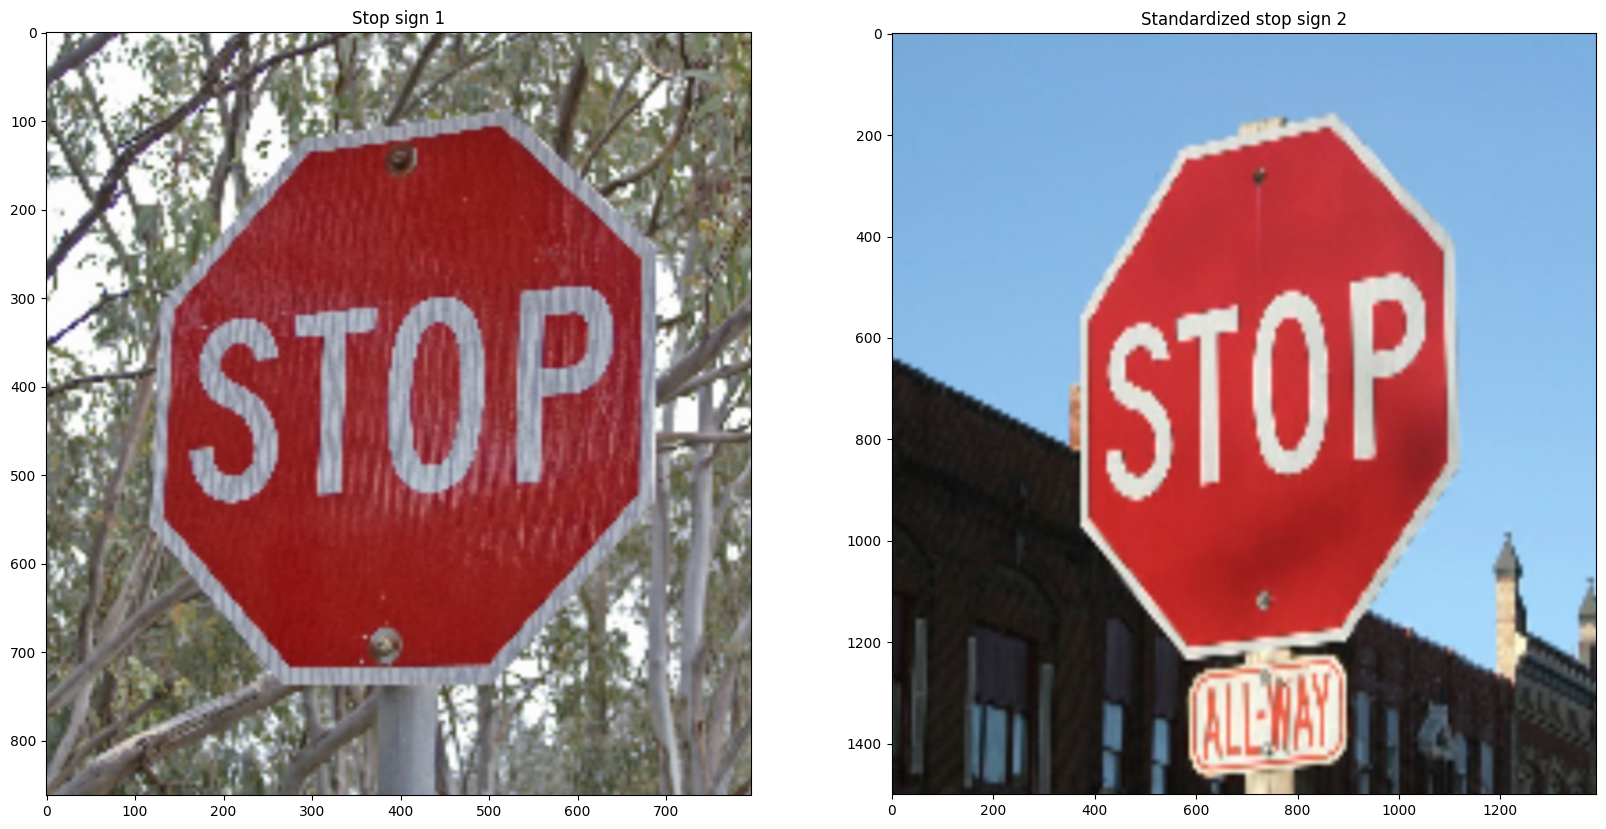

In [22]:
# Use OpenCV's resize function
standardized_im = cv2.resize(image_crop, (1389, 1500))

print('Image shape: ', standardized_im.shape)

# Plot the two images side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stop sign 1')
ax1.imshow(stop1)
ax2.set_title('Standardized stop sign 2')
ax2.imshow(standardized_im)

## Compare these images

In [23]:
# Sum all the red channel values and compare
red_sum1 = np.sum(stop1[:,:,0])
red_sum2 = np.sum(standardized_im[:,:,0])

print('Sum of all red pixel values in the first stop sign image: ', red_sum1)
print('Sum of red pixel values in the second, standardized image: ', red_sum2)

red_sum_orig = np.sum(stop2[:,:,0])

print('\nFor comparison, the sum of red pixels in the non-standardized image: ', red_sum_orig)



Sum of all red pixel values in the first stop sign image:  96323766
Sum of red pixel values in the second, standardized image:  277230491

For comparison, the sum of red pixels in the non-standardized image:  107263427


# Color Masking, Green Screen

Image dimensions: (450, 660, 3)


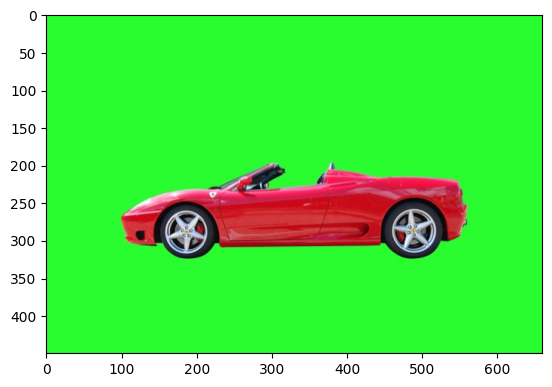

In [25]:
# Read in the image
image = mpimg.imread('car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)

# Display the image
plt.imshow(image)

### Define the color threshold

In [26]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

### Create a mask

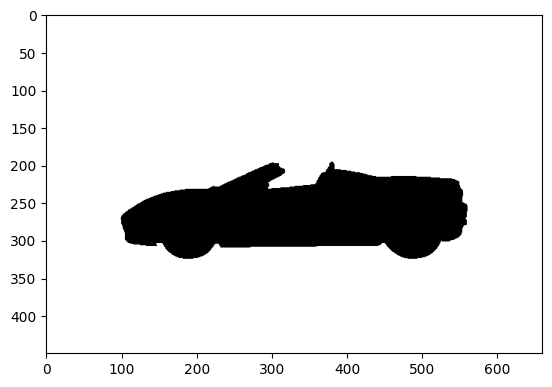

In [27]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

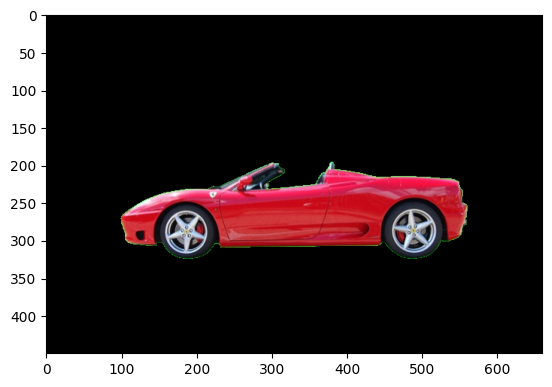

In [28]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


# Color Conversion
## HSV colorspace

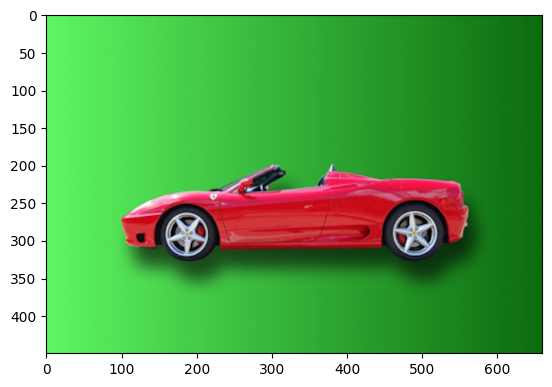

In [29]:
# Read in the image
image = mpimg.imread('car_green_screen2.jpg')

plt.imshow(image)

### RGB threshold
Visualize the green threshold you defined in the previous, consistent green color case.

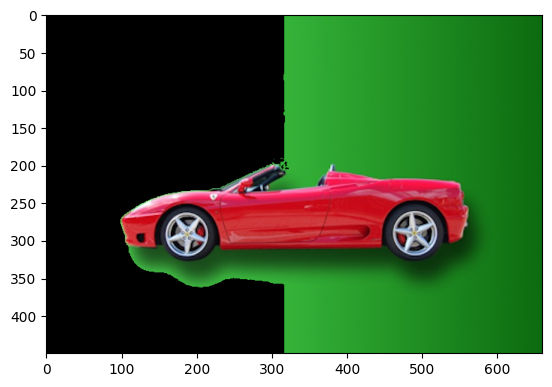

In [30]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

## Convert to HSV

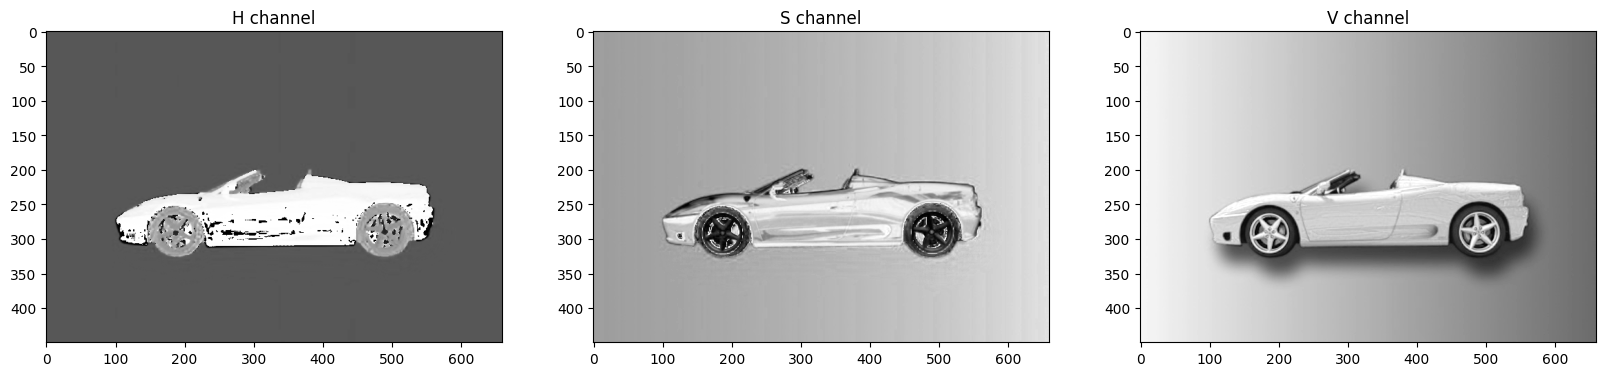

In [31]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')